In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn, sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from __future__ import division
import cvxopt

In [ ]:
X = np.array([[1,4],[-3,3],[-2.5, 5], [0,1],[2, 0.5], [1, 2]])
y=np.ones((len(X), 1))
y[3:,0] =-1

In [ ]:
X

array([[ 1. ,  4. ],
       [-3. ,  3. ],
       [-2.5,  5. ],
       [ 0. ,  1. ],
       [ 2. ,  0.5],
       [ 1. ,  2. ]])

In [ ]:
y

array([[ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.]])

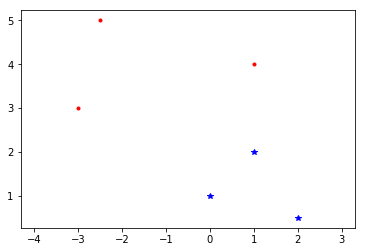

In [ ]:
plt.axis('equal')
plt.plot(X[0:3, 0],X[0:3, 1], 'r.', X[3:, 0],X[3:, 1], 'b*')

In [ ]:
#Importing with custom names to avoid issues with numpy / sympy matrix
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

#Initializing values and computing H. Note the 1. to force to float type
m,n = X.shape
#y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) 

#Converting into cvxopt format
'''P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))'''
P = cvxopt_matrix(H)
q = cvxopt_matrix(-1*np.ones((m,1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros((m)))
A = cvxopt_matrix(y.T)
b = cvxopt_matrix(np.zeros(1))
#Setting solver parameters (change default to decrease tolerance) 
cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

In [ ]:
alphas

array([[4.68750000e-01],
       [6.25000000e-02],
       [1.97861647e-11],
       [1.79322288e-12],
       [4.32814763e-12],
       [5.31250000e-01]])

In [ ]:
??cvxopt_solvers.qp

In [ ]:
w = np.sum(alphas * X_dash, axis=0, keepdims=True).T

In [ ]:
w = np.zeros((n,1))
for i in range(len(alphas)):
    w += (alphas[i,0]*X[i,:]*y[i,0]).reshape((-1,1))

In [ ]:
alphas

array([[4.68750000e-01],
       [6.25000000e-02],
       [1.97861647e-11],
       [1.79322288e-12],
       [4.32814763e-12],
       [5.31250000e-01]])

In [ ]:
#w parameter in vectorized form
#w = ((y * alphas).T @ X).reshape(-1,1)

#Selecting the set of indices S corresponding to non zero parameters
S = (alphas > 1e-4).flatten()

#Computing b
# y(w'x + b) = 1 => b = 1/y-w'x 
b = y[S] - np.dot(X[S], w)#

#Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
bias = b[0]
print('b = ',bias)


('Alphas = ', array([0.46875, 0.0625 , 0.53125]))
('w = ', array([-0.25,  1.  ]))
('b = ', array([-2.75]))


In [ ]:
X.dot(w)+bias

array([[ 1.   ],
       [ 1.   ],
       [ 2.875],
       [-1.75 ],
       [-2.75 ],
       [-1.   ]])

In [ ]:
x1 = np.linspace(-4,4)
#w'[x1 x2] + b =0 => x2 = (-b-w1*x1)w2
x2 = (-bias-w[0,0]*x1)/w[1,0]
#check np.vstack([x1, x2]).T.dot(w) + bias

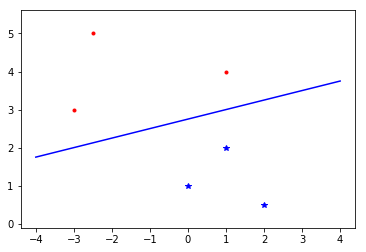

In [ ]:
plt.axis('equal')
plt.plot(X[0:3, 0],X[0:3, 1], 'r.', X[3:, 0],X[3:, 1], 'b*')
plt.plot(x1, x2, 'b-')